# Evaluating the linearity of the exponential BP - arterial cross section model

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from IPython.display import Latex
import pint
ureg = pint.UnitRegistry()
# plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams["figure.figsize"] = (7,3)

Given the exponential BP - artial cross section model:

$$ P(t) = P_d \cdot e^{\alpha \left( \frac{A(t)}{A_d} - 1 \right)} $$

$$ \alpha = \frac{ A_d \cdot \ln \left(\frac{P_s}{P_d} \right)}{A_s - A_d} $$

Where $P(t)$ is the blood pressure at arterial cross section $A(t)$, $P_d$ and $P_s$ are the diastolic and systolic blood pressure levels and $A_d$ and $A_s$ are the diastolic and systolic cross sections.

Assuming that the artery is rotationally symmetric, the cross sections can be expressed in terms of the diameter by the formula: $A(t) = \frac{\pi d^2(t)}{4}$. Substituting the expression for $\alpha$ into the expression for $P(t)$, and simplifying the left and right side, the following expression can be reached:

$$ \frac{ \ln ( P(t) / P_d )}{ \ln ( P_s / P_d )} = \frac{d^2(t) - d^2_d}{d^2_s - d^2_d} $$

Showing a logarithmic relationship between the blood pressures and an exponential relationship between the diameters (resulting from the linear relationship between the cross sections).

Plotting the logarithmic relationship, given a linear increase in $P(t)$ results in the following graph, showing the distortion:

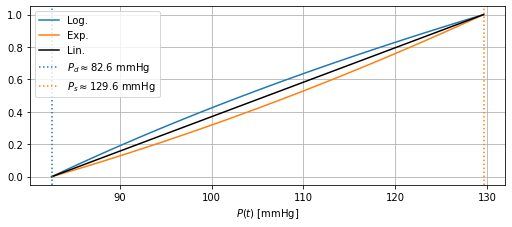

In [55]:
# Values taken from:
# "Normal values for ambulatory blood pressure and
# differences between casual blood pressure and
# ambulatory blood pressure"
PS = 129.6 * ureg.mmHg
PD = 82.6 * ureg.mmHg

t = np.linspace(0, 1, 30)
Pt = PD + t * (PS - PD)

Pratlog = np.log(Pt / PD) / np.log(PS / PD)
Pratlin =       (Pt - PD) /       (PS - PD)
Pratexp =       (Pt**2 - PD**2) /       (PS**2 - PD**2)

# Plot data
plt.plot(Pt.magnitude, Pratlog.magnitude, label="Log.", c="C0")
plt.plot(Pt.magnitude, Pratexp.magnitude, label="Exp.", c="C1")
plt.plot(Pt.magnitude, Pratlin.magnitude, label="Lin.", c="black")
plt.axvline(PD.magnitude, ls=":", c="C0", label=fr"$P_d \approx {PD:L~}$")
plt.axvline(PS.magnitude, ls=":", c="C1", label=fr"$P_s \approx {PS:L~}$")
plt.legend()
plt.grid()
plt.xlabel(r"$P(t)$ [mmHg]")
plt.savefig("linearity.pdf")

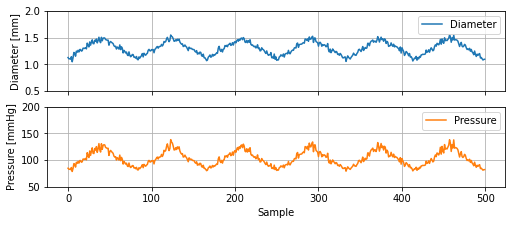

In [48]:
# Diameter parameters
d_s = 1.5
d_d = 1.1
p_s = 129.6
p_d = 82.6

# Diameter waveform
t = np.linspace(0, 12*np.pi, 500)
d_t = d_d + 0.5 * (signal.sawtooth(t, width=0.5) + 1) * (d_s - d_d) + np.random.randn(len(t)) * 0.03

# Pressure waveforms
p_t = p_d * np.exp( np.log(p_s / p_d) * (d_t**2 - d_d**2) / (d_s**2 - d_d**2) )

# Plot data
fig: plt.Figure
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(d_t, c="C0", label="Diameter")
axs[1].plot(p_t, c="C1", label="Pressure")

axs[0].set_ylabel("Diameter [mm]")
axs[1].set_ylabel("Pressure [mmHg]")
axs[1].set_xlabel("Sample")
axs[1].set_ylim([50, 200])
axs[0].set_ylim([0.5, 2])
for ax in axs:
    ax.grid()
    ax.legend()

fig.savefig("pulse.pdf")

# Estimating expansion of the frontal branch of the superficial temporal artery

From "*Noninvasive and Nonocclusive Blood Pressure Monitoring via a Flexible Piezo-Composite Ultrasonic Sensor*", a graph can be found measuring the diameter of the Ulnar artery over time, showing the highs, lows and mean:

$$ d_{s,ulnar} \approx 2.90 \text{ mm} \quad d_{d,ulnar} \approx 2.25 \text{ mm} \quad \overline d_{ulnar} \approx 2.56 \text{ mm} $$

Assuming that the relative expansion scales with the diameter of the artery, this range can be remapped to give an estimate of $d_{s,STA}$ and $d_{d,STA}$, where STA stands for Superficial Temporal Artery. The appoximate diameter of the STA has been found in "*In vivo analysis of the vascular pattern of the superficial temporal artery based on digital subtraction angiography*" to be around $\overline d_{STA} \approx 1.3 \text{ mm}$. 

In [18]:
# Known values
d_s_ulnar = 2.90 * ureg.mm
d_d_ulnar = 2.25 * ureg.mm
d_ulnar   = 2.56 * ureg.mm
d_sta     = 1.30 * ureg.mm

# Diameter scaling factor
k = d_sta / d_ulnar

# Estimated values for STA
d_s_sta = d_s_ulnar * k
d_d_sta = d_d_ulnar * k
D_d_sta = d_s_sta - d_d_sta

# Display results
display(Latex(fr"$d_{{s,STA}} \approx {d_s_sta:.2L~}$"))
display(Latex(fr"$d_{{d,STA}} \approx {d_d_sta:.2L~}$"))
display(Latex(fr"$\Delta d_{{STA}} \approx {D_d_sta:.2L~}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
D_d_sta = 0.4 * ureg.mm

In [29]:
(D_d_sta / 10).to(ureg.um)

40.0 <Unit('micrometer')>

In [40]:
(D_d_sta / (80 * ureg.um)).to_base_units()

5.0 <Unit('dimensionless')>